In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [19]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [21]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
df['Age']=df['Age'].fillna(df['Age'].median())
df['Survived']=df['Survived'].fillna(df['Survived'].mode())

In [23]:
#lableEncoder 

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [24]:
# Features & Target
x = df.drop('Survived', axis=1)
y = df['Survived']

In [25]:
corr = df.corr()
print(corr['Survived'].sort_values(ascending=False))

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.163517
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x, y)

imp = pd.Series(dt.feature_importances_, index=x.columns)
imp = imp.sort_values(ascending=False)

imp

Sex         0.310881
Age         0.261162
Fare        0.235208
Pclass      0.109342
SibSp       0.047098
Embarked    0.019719
Parch       0.016591
dtype: float64

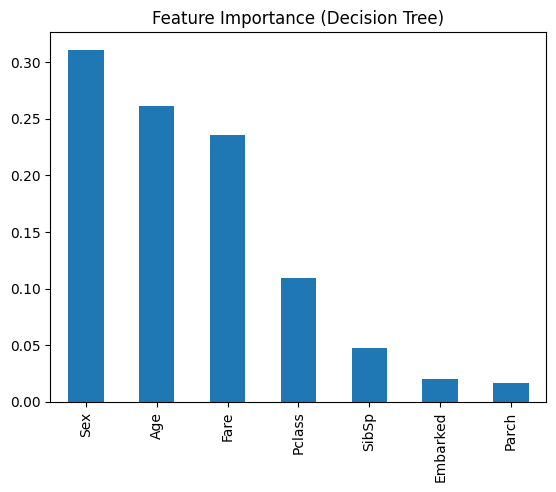

In [31]:
#importance chat
plt.figure()
imp.plot(kind='bar', title='Feature Importance (Decision Tree)')
plt.show()

In [33]:
low_imp = imp[imp < 0.02].index
x_reduced = x.drop(columns=low_imp)

print("\nRemoved Low Importance Features:", list(low_imp))


Removed Low Importance Features: ['Embarked', 'Parch']


In [34]:
corr_matrix = x_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = [col for col in upper.columns if any(upper[col] > 0.9)]
x_reduced = x_reduced.drop(columns=high_corr)

print("Removed Highly Correlated Features:", high_corr)

Removed Highly Correlated Features: []


In [35]:
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(x, y)

selected_rfe = x.columns[rfe.support_]
print("RFE Selected Features:", list(selected_rfe))

RFE Selected Features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [36]:
print(x.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [38]:
# insight

#Feature engineering was performed by creating new features from existing variables, handling missing values, and applying numerical transformations. 
#Categorical variables were encoded using Label, One Hot, and Ordinal Encoding. 
#Feature importance was identified using correlation analysis and a Decision Tree model. 
#Low-importance and highly correlated features were removed to reduce redundancy. 
#Finally RFE were used to select the most relevant features for modeling.